In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

### 파일 로드

In [142]:
wod_data = pd.read_csv('wod_data.csv')
print(wod_data.shape)
wod_data.head()

(26730, 7)


,date,wod,man_setting,woman_setting,athlete,comment,url
0,2025-06-04,"For total reps: Tabata double-unders Then, com...",50-lb dumbbell,35-lb dumbbell,Ralph Keeley,M/39/6’/177# 222/64/240 Rx Deo gratias,https://www.crossfit.com/250604
1,2025-06-04,"For total reps: Tabata double-unders Then, com...",50-lb dumbbell,35-lb dumbbell,Jeff Chalfant,409 reps with 30” box step ups instead of sing...,https://www.crossfit.com/250604
2,2025-06-04,"For total reps: Tabata double-unders Then, com...",50-lb dumbbell,35-lb dumbbell,Mike McEachron,Rx Dubs 160 Alt snatch 24 Alt leg squat 24 Dub...,https://www.crossfit.com/250604
3,2025-06-04,"For total reps: Tabata double-unders Then, com...",50-lb dumbbell,35-lb dumbbell,Sam K,Rx Just spent the tabata DUB time whipping mys...,https://www.crossfit.com/250604
4,2025-06-04,"For total reps: Tabata double-unders Then, com...",50-lb dumbbell,35-lb dumbbell,Edward Mao,585 RX,https://www.crossfit.com/250604


In [143]:
wod_data['date'].unique().shape

(1563,)

### 결측치 제거

In [144]:
wod_data.dropna(subset=['wod', 'athlete', 'comment'], inplace=True)
wod_data.shape

(26521, 7)

In [145]:
wod_data.isnull().sum()

date                0
wod                 0
man_setting      8670
woman_setting    8670
athlete             0
comment             0
url                 0
dtype: int64

### For Time 와드 필터링

In [254]:
wod_fortime = wod_data[wod_data['wod'].str.contains('for time', case=False)]
print(wod_fortime.shape)
print(wod_fortime['date'].unique().shape)

(16825, 7)
(787,)


### Comment -> Record -> timedelta -> second 로 변환

In [255]:
def comment_to_records(df):
    df['record'] = df['comment'].str.extract(r'(\d+:\d+)')
    df.dropna(subset=['record'], inplace=True)
    df['record'] = df['record'].apply(lambda x: f"00:{x}" if len(str(x).split(':')) == 2 else x)
    df['record'] =  pd.to_timedelta(df['record'])
    df['record_seconds'] = df['record'].dt.total_seconds()
    df['record_seconds'] = df['record_seconds'].astype(int)


In [256]:
comment_to_records(wod_fortime)

print(wod_fortime.shape)
wod_fortime.head()

(14545, 9)


/var/folders/q5/qq64gk4d1838ptwtyykctkl00000gn/T/ipykernel_7471/1140834208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['record'] = df['comment'].str.extract(r'(\d+:\d+)')
/var/folders/q5/qq64gk4d1838ptwtyykctkl00000gn/T/ipykernel_7471/1140834208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['record'], inplace=True)
/var/folders/q5/qq64gk4d1838ptwtyykctkl00000gn/T/ipykernel_7471/1140834208.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,date,wod,man_setting,woman_setting,athlete,comment,url,record,record_seconds
20,2025-06-03,For time: 30 deadlifts 20 hang squat cleans 10 shoulder-to-overheads,205 lb,145 lb,Thomas Streck,Intermediate option: RX 155lb﻿s across all movements 10:28﻿,https://www.crossfit.com/250603,0 days 00:10:28,628
21,2025-06-03,For time: 30 deadlifts 20 hang squat cleans 10 shoulder-to-overheads,205 lb,145 lb,Ryan Porter,30 deadlifts (20-10) 20 HSC (5-5-7-3) 10 PushPress Rx 6:54,https://www.crossfit.com/250603,0 days 00:06:54,414
22,2025-06-03,For time: 30 deadlifts 20 hang squat cleans 10 shoulder-to-overheads,205 lb,145 lb,Nate Loehr,M/47/215/5’11 7:37 Rx,https://www.crossfit.com/250603,0 days 00:07:37,457
23,2025-06-03,For time: 30 deadlifts 20 hang squat cleans 10 shoulder-to-overheads,205 lb,145 lb,Derek Eason,Rx 7:35 *Deadlifts: 10/10/9/1 *Hang Squat Cleans: 5/5/5/5 *S2OH: 4/3/3 (Split Jerks),https://www.crossfit.com/250603,0 days 00:07:35,455
25,2025-06-03,For time: 30 deadlifts 20 hang squat cleans 10 shoulder-to-overheads,205 lb,145 lb,Tony Facchini,6:49 RX very deconditioned on the barbell. Just tried to keep moving.,https://www.crossfit.com/250603,0 days 00:06:49,409


### EDA

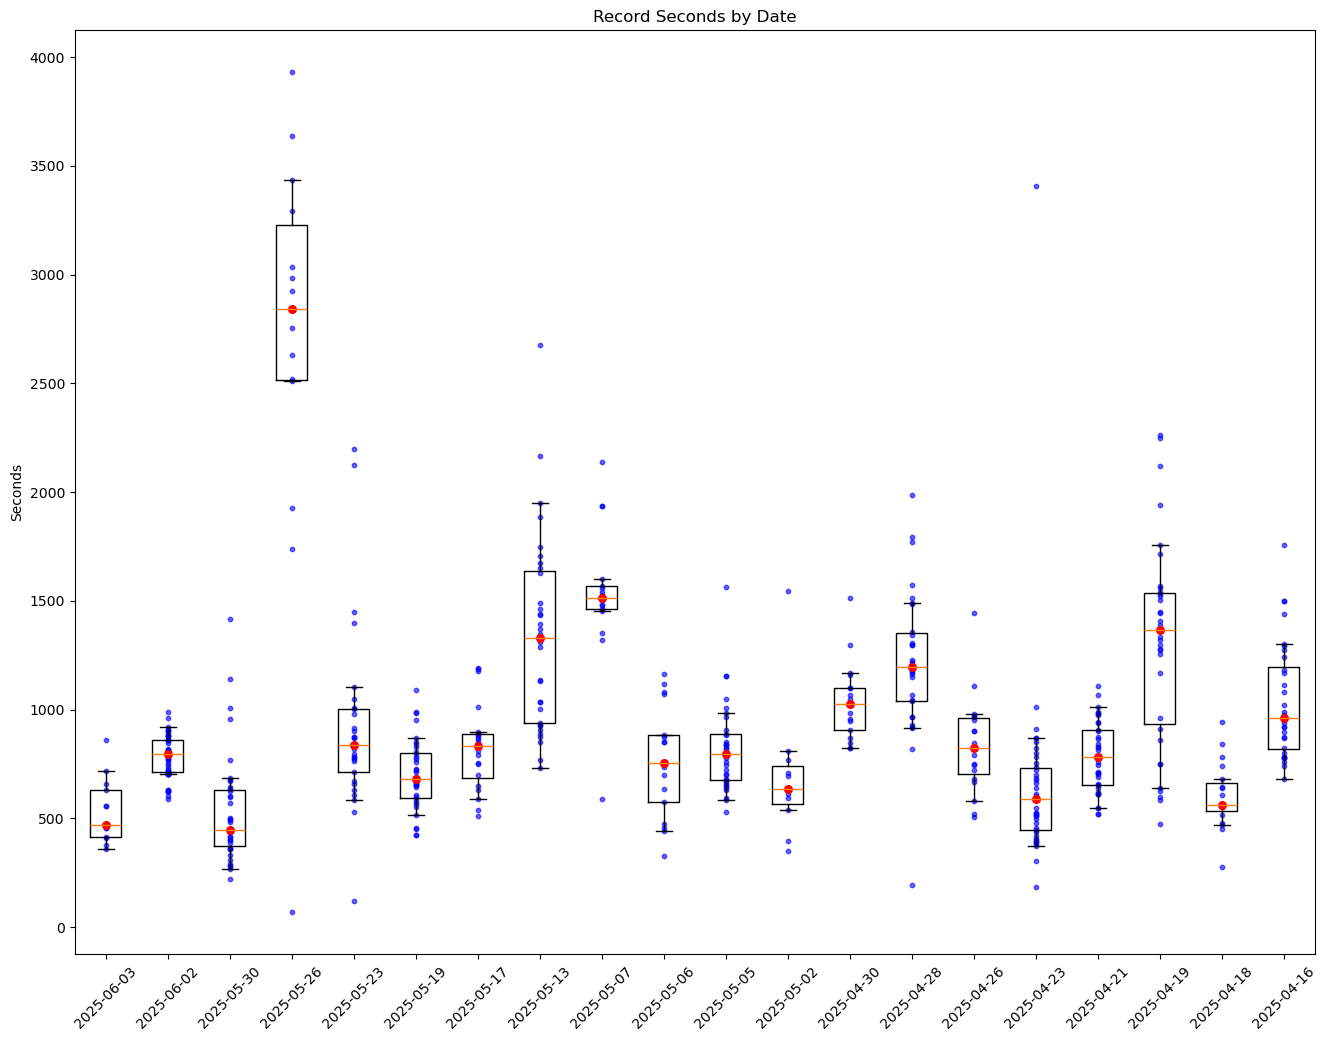

In [257]:
plt.figure(figsize=(16, 12))
selected_dates = wod_fortime['date'].unique()[:20]
# selected_dates = ['2025-05-17']
data = [wod_fortime[wod_fortime['date'] == d]['record_seconds'].values for d in selected_dates]

plt.boxplot(data, labels=selected_dates, showfliers=False, whis=0.5)

for i, values in enumerate(data, 1):  # 1부터 시작 (boxplot 위치는 1-indexed)
    y = values
    x = [i] * len(y)  # 같은 위치에 여러 점
    plt.scatter(x, y, alpha=0.6, color='blue', s=10)  # s=점 크기
    plt.scatter(i, np.median(values), color='red', s=30)

plt.title("Record Seconds by Date")
plt.ylabel("Seconds")
plt.xticks(rotation=45)
plt.show()

Q3 + 0.5\*IQR, Q1 - 0.5\*IQR 이면 이상치로 간주   
중위값 이상이면 중급자, 중위값 미만이면 상급자   
와드별로 분산이 다르기 때문에 수준을 나누기는 어렵고 중위값으로 치환  
 
아님 모델 세개?   

중위값->Advanced   
Q1->Ellite   
Q3->Intermediate  

우리 박스 내에서 상급자, 중급자, 초급자 표본 선정해서 데이터와 비교해보고 기준 설정 (주관적)

### WOD별 기록 이상치 제거

In [258]:
def detect_outliers(group):
    Q1 = group['record'].quantile(0.25)
    Q3 = group['record'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 0.5 * IQR
    upper = Q3 + 0.5 * IQR
    return group[(group['record'] < lower) | (group['record'] > upper)]

outliers = wod_fortime.groupby('wod', group_keys=False).apply(detect_outliers)

print(f"Total number of outliers: {outliers.shape[0]}")

Total number of outliers: 2937


In [259]:
wod_fortime = wod_fortime[~wod_fortime.index.isin(outliers.index)]
print(f"Data shape after removing outliers: {wod_fortime.shape}")

Data shape after removing outliers: (11608, 9)


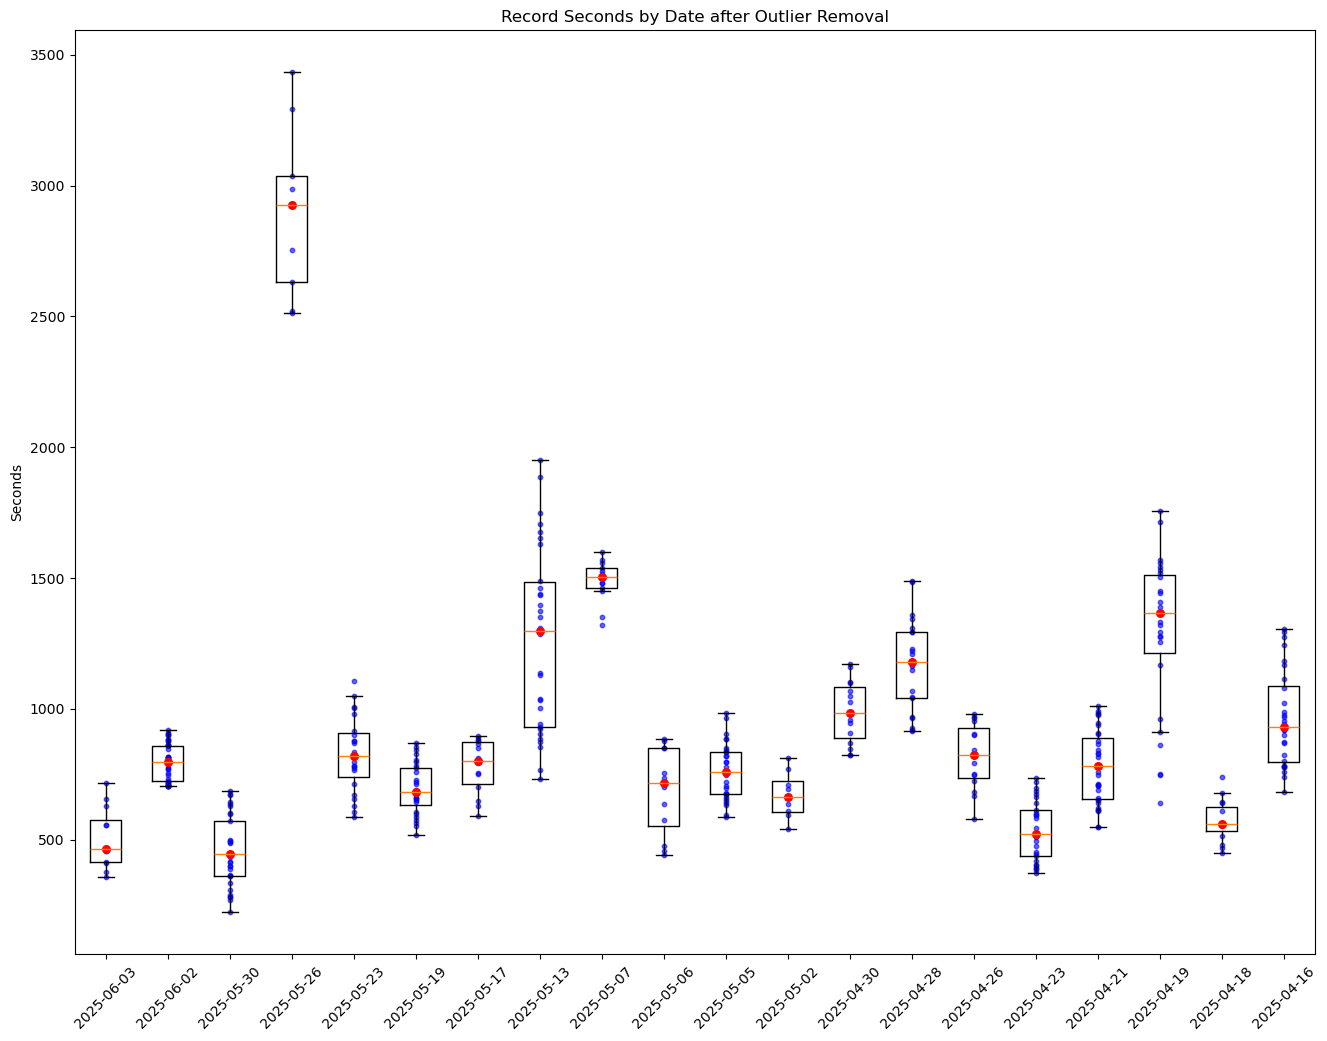

In [262]:
plt.figure(figsize=(16, 12))
selected_dates = wod_fortime['date'].unique()[:20]
# selected_dates = ['2025-05-17']
data = [wod_fortime[wod_fortime['date'] == d]['record_seconds'].values for d in selected_dates]

plt.boxplot(data, labels=selected_dates, showfliers=False, whis=1.0)

for i, values in enumerate(data, 1):  # 1부터 시작 (boxplot 위치는 1-indexed)
    y = values
    x = [i] * len(y)  # 같은 위치에 여러 점
    plt.scatter(x, y, alpha=0.6, color='blue', s=10)  # s=점 크기
    plt.scatter(i, np.median(values), color='red', s=30)

plt.title("Record Seconds by Date after Outlier Removal")
plt.ylabel("Seconds")
plt.xticks(rotation=45)
plt.show()

### 기록들 중위값으로 대체

In [280]:
wod_fortime['median_record_seconds'] = wod_fortime.groupby('date')['record_seconds'].transform('median')
wod_fortime_median = wod_fortime[['date', 'wod', 'man_setting','woman_setting','median_record_seconds']].drop_duplicates(subset=['date']).sort_values(by='date', ascending=False)
print(wod_fortime_median.shape)
wod_fortime_median.head(5)

(783, 5)


,date,wod,man_setting,woman_setting,median_record_seconds
20,2025-06-03,For time: 30 deadlifts 20 hang squat cleans 10 shoulder-to-overheads,205 lb,145 lb,462.5
39,2025-06-02,"For time: 1,600/2,000-meter row Every 90 seconds, including the start, perform 3 wall walks until you complete the row.",NaN,NaN,797.5
114,2025-05-30,Elizabeth 21-15-9 reps for time of: Cleans Ring dips,135 lb,95 lb,443.0
207,2025-05-26,"Murph For time: Run 1 mile 100 pull-ups 200 push-ups 300 air squats Run 1 mile Partition the pull-ups, push-ups, and squats as needed. If you’ve got a 14/20-lb vest or body armor, wear it.",NaN,NaN,2926.0
244,2025-05-23,5 rounds for time of: 15 GHD back extensions 25 AbMat sit-ups 50 double-unders,NaN,NaN,820.0


In [282]:
wod_fortime_median.reset_index(inplace=True)
wod_fortime_median.drop(columns=['index'], inplace=True)
wod_fortime_median.head()

,date,wod,man_setting,woman_setting,median_record_seconds
0,2025-06-03,For time: 30 deadlifts 20 hang squat cleans 10 shoulder-to-overheads,205 lb,145 lb,462.5
1,2025-06-02,"For time: 1,600/2,000-meter row Every 90 seconds, including the start, perform 3 wall walks until you complete the row.",NaN,NaN,797.5
2,2025-05-30,Elizabeth 21-15-9 reps for time of: Cleans Ring dips,135 lb,95 lb,443.0
3,2025-05-26,"Murph For time: Run 1 mile 100 pull-ups 200 push-ups 300 air squats Run 1 mile Partition the pull-ups, push-ups, and squats as needed. If you’ve got a 14/20-lb vest or body armor, wear it.",NaN,NaN,2926.0
4,2025-05-23,5 rounds for time of: 15 GHD back extensions 25 AbMat sit-ups 50 double-unders,NaN,NaN,820.0
